In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
x_dev = data_dev[1:n]
y_dev = data_dev[0]

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train/ 255.

In [4]:
x_train, y_train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 8, 1, ..., 9, 7, 0]))

In [5]:
def init_parameters():
    
    w1 = np.random.rand(10, 784) - 0.5 
    # each of 10 nodes has 784 connections
    b1 = np.random.rand(10, 1) - 0.5 
    # each of 10 nodes has 1 bias value
    
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    
    return w1, b1, w2, b2

def sigmoid(x):

    return 1 / (1 + np.exp(-x))

def softmax(x):

    a = np.exp(x) / sum(np.exp(x))
    return a

def ReLU(Z):
    return np.maximum(Z, 0)
def ReLU_deriv(Z):
    return Z > 0

def forward_prop(w1, b1, w2, b2, x):
    
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    
    return z1, a1, z2, a2

def one_hot(y):
    
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    
    return one_hot_y

def derivative_sigmoid(x):
    
    return sigmoid(x) *(1-sigmoid(x))

def backward_prop(z1, a1, z2, a2, w1, w2, x, y):
    
    m = y.size
    one_hot_y = one_hot(y)
    
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    
    dz1 = w2.T.dot(dz2) * ReLU_deriv(z1)
    
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1)

    return dw1, db1, dw2, db2  

def update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w_1 = w1
    w1 = w1 - alpha * dw1
    w2 = w2 - alpha * dw2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    
    return w1, b1, w2, b2

In [21]:
def get_predictions(a):
    return np.argmax(a, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def plot_loss_function(predictions, y):
    
    squared_error = (predictions - y ) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y.size
    
    return loss

def gradient_descent(x, y, iterations, alpha):
    
    
    loss_iteration = []
    w1, b1, w2, b2 = init_parameters()
    for i in range(iterations):
        
        # print(w1, b1, w2, b2, x)
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w1, w2, x, y)
        predictions = get_predictions(a2)
        loss_iteration.append(plot_loss_function(predictions, y))
        w1, b1, w2, b2 = update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        
        if(i % 100 == 0):
            
            print("iteration: ", i)
            predictions = get_predictions(a2)
            
            print("Accuracy: ", get_accuracy(predictions, y))
        
    plt.figure(figsize = (25, 15))
    plt.plot(np.arange(iterations), loss_iteration)
    return w1, b1, w2, b2
        

iteration:  0
[9 4 9 ... 9 3 9] [0 8 1 ... 9 7 0]
Accuracy:  0.13641463414634147
iteration:  100
[0 5 1 ... 9 7 0] [0 8 1 ... 9 7 0]
Accuracy:  0.8193170731707317
iteration:  200
[0 5 1 ... 9 7 0] [0 8 1 ... 9 7 0]
Accuracy:  0.8873414634146342
iteration:  300
[0 5 1 ... 9 7 0] [0 8 1 ... 9 7 0]
Accuracy:  0.899219512195122
iteration:  400
[0 8 1 ... 9 7 0] [0 8 1 ... 9 7 0]
Accuracy:  0.9060243902439025
iteration:  500
[0 8 1 ... 9 7 0] [0 8 1 ... 9 7 0]
Accuracy:  0.9069512195121952
iteration:  600
[0 5 1 ... 9 7 0] [0 8 1 ... 9 7 0]
Accuracy:  0.8848536585365854
iteration:  700
[0 8 1 ... 9 7 0] [0 8 1 ... 9 7 0]
Accuracy:  0.9173414634146342
iteration:  800
[0 8 1 ... 9 7 0] [0 8 1 ... 9 7 0]
Accuracy:  0.8973658536585366
iteration:  900
[0 8 1 ... 9 7 0] [0 8 1 ... 9 7 0]
Accuracy:  0.9184146341463415


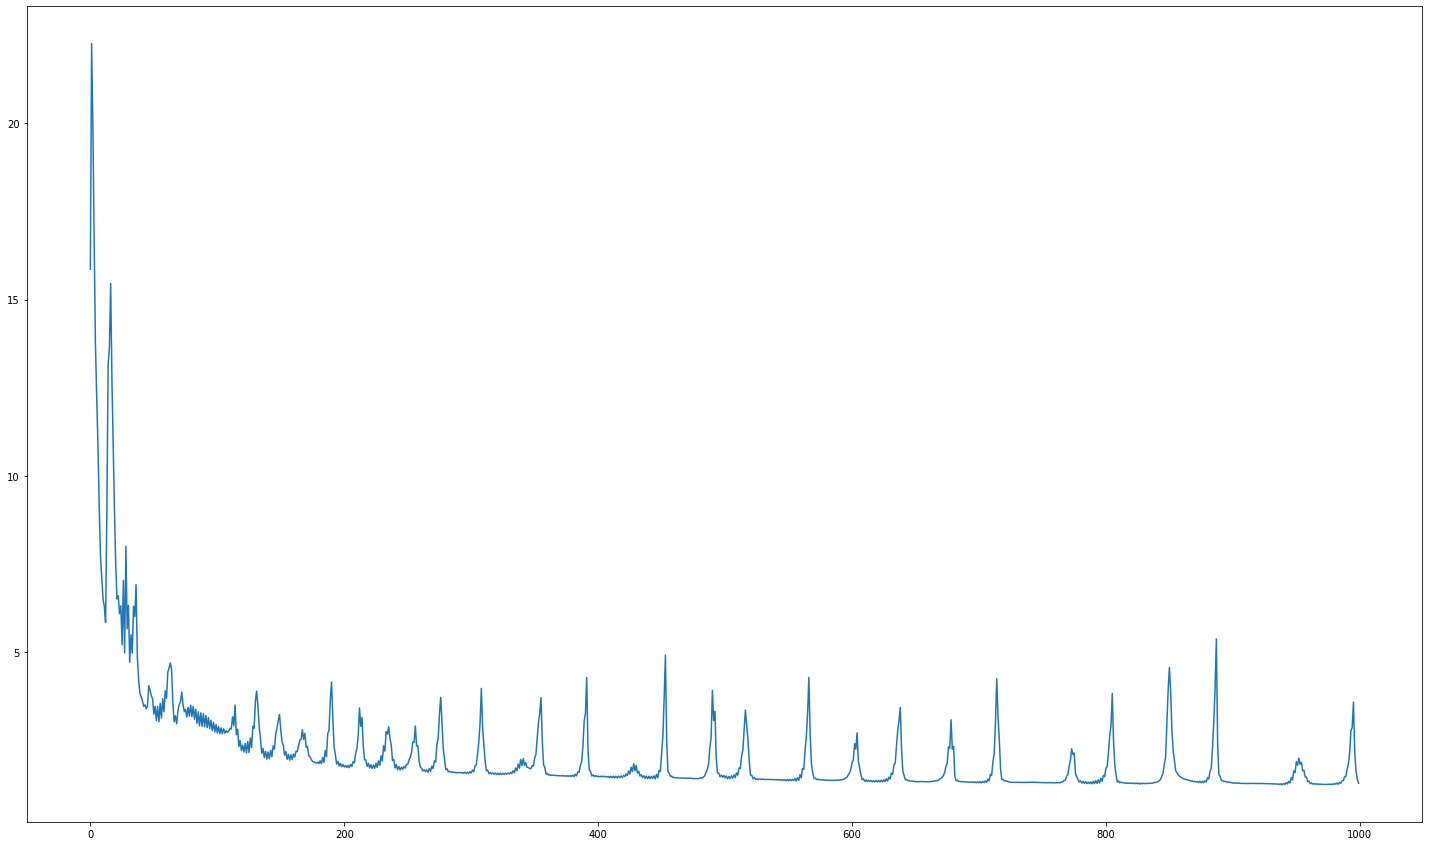

In [22]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 1000, 0.9)

In [ ]:
# testing is pending
